In [1]:
%matplotlib inline
import precomputed_domain
import numpy as np
import brewer2mpl

# brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors

/usr/local/lib/python2.7/dist-packages/numba/dataflow.py:346: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


## Plotting parameters

In [4]:
maze = "hard"
domain = precomputed_domain.precomputed_maze_domain(maze,storage_directory="./logs/",mmap=True)

cached...


In [5]:
for k in range(1,5):
 domain.kstep_evolvability_calculate(k)
domain.everywhere_evolvability_calculate()

not cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached...
cached

In [6]:
evo = domain.data["evolvability"]
beh = domain.data["x"],domain.data["y"]

fitness = np.sqrt(  ((beh[0].astype(np.int32))-domain.goal[0])**2 + ((beh[1].astype(np.int32))-domain.goal[1])**2 )
solution_distance = domain.distance
solution = domain.data["solution"]

print domain.goal
print solution.sum()


print beh[0][0]-domain.goal[1]
print beh[1][0]-domain.goal[0]
print fitness[0]
print fitness.mean()

print len(np.unique(domain.data["behaviorhash"]))

(31, 20)
59
71
103
128.825463322
146.516220606
303


# Evolvability

## Evolvability histogram

cached...
cached...
cached...
cached...


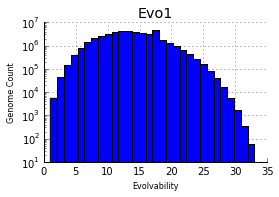

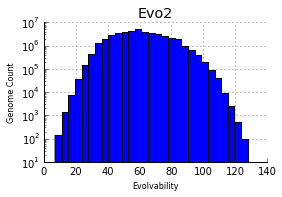

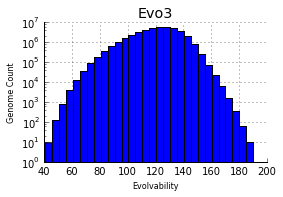

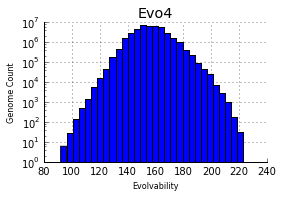

In [7]:
from pylab import *

params = {
   'axes.labelsize': 8,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.0, 2.5]
   }
rcParams.update(params)

for k in range(1,5):
 domain.kstep_evolvability_calculate(k)
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Evolvability")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(domain.evo[k],bins=30)
 ax.set_title("Evo%d"%k)
 fig.savefig("evolvability_distribution%s_%d.pdf"%(maze,k), bbox_inches='tight')

## K-step Evolvability

cached...
cached...
cached...
cached...


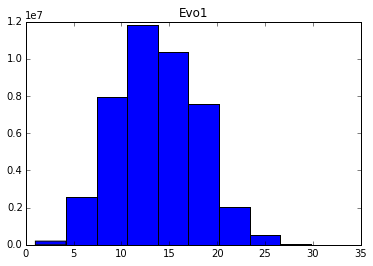

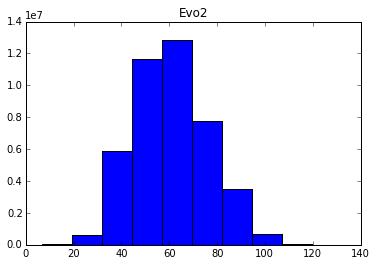

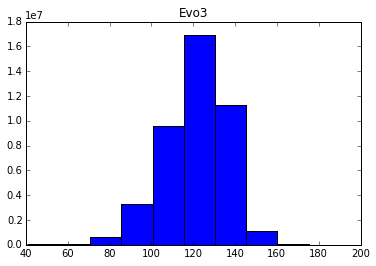

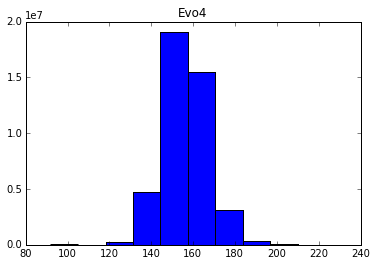

In [6]:

for k in range(1,5):
 domain.kstep_evolvability_calculate(k)
 title("Evo%d" % k) 
 hist(domain.evo[k])
 figure()

## Everywhere-evolvability

cached...


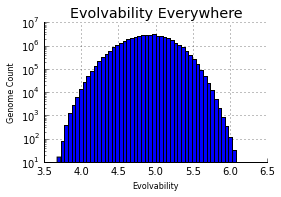

In [50]:
domain.everywhere_evolvability_calculate()

if True:
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Evolvability")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(domain.evo_everywhere,bins=50)
 ax.set_title("Evolvability Everywhere")
 fig.savefig("evolvability_everywhere%s.pdf"%maze, bbox_inches='tight')

In [13]:
worst = np.argmax(domain.evo_everywhere)
print worst,domain.data["evolvability"][worst]

best = np.argmin(domain.evo_everywhere)
print best,domain.data["evolvability"][best]

37227145 6
2203349 26


# Fitness 

43046721
320


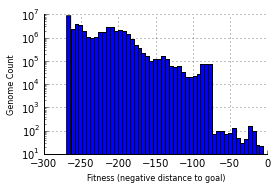

In [70]:
#hist(fitness,bins=100)

if True:
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Fitness (negative distance to goal)")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(-fitness,bins=50)
 fig.savefig("fitness_distribution_%s.pdf"%maze, bbox_inches='tight')

print (fitness>-20.0).sum()
print solution.sum()

# Solution Distance

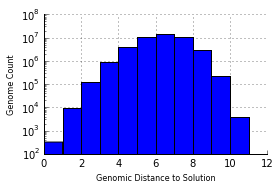

In [63]:
if True:
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Genomic Distance to Solution")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(domain.distance,bins=11)
 fig.savefig("fitness_distribution_%s.pdf"%maze, bbox_inches='tight')



# Binning

In [8]:
import matplotlib.pyplot as plt
import random

def aggregate1d(x,y,gridsize=50):
    cnt=np.zeros(gridsize)
    total = np.zeros(gridsize)
    
    xmax = x.max()+0.00001
    xmin = x.min()-0.00001
    
    xcoord =  ( ((x-xmin))/(xmax-xmin)*(gridsize) ).astype(np.uint32)
    np.add.at(cnt,xcoord,1)
    np.add.at(total,xcoord,y)
    mean = total/cnt
    
    xc=np.linspace(xmin,xmax,gridsize)
    
    return xc,mean

def aggregate1d_prime(x,y,gridsize=50):
    cnt=np.zeros(gridsize)
    total = np.zeros(gridsize)
    
    xmax = x.max()+0.00001
    xmin = x.min()-0.00001
    
    grid = np.linspace(xmin,xmax,gridsize+1)
    grid_y =[]
    grid_x = []

    for _ in xrange(gridsize):
        cond = np.logical_and(x>grid[_],x<=grid[_+1])
        grid_y.append(y[cond])
        xc = (grid[_]+grid[_+1])/2.0
        grid_x.append(xc)
            
    return grid_x,grid_y

def perc(data_array,rng=25):
    median = [np.median(data) for data in resy]
    mean = [data.mean() for data in resy]
    upper = [np.percentile(data,100-rng) for data in resy]
    lower = [np.percentile(data,rng) for data in resy]
    return mean,median,upper,lower


def sample2d(x,y,samples=10000):
 sampled_idxes = np.random.randint(0,len(x),samples)
 xprime = x[sampled_idxes]
 yprime = y[sampled_idxes]
 return xprime,yprime

def heatmap(x,y,gridsize=[50,50],maxsize=100000):
 xmin = x.min()
 xmax = x.max()
 ymin = y.min()
 ymax = y.max()

 heatmap, xedges, yedges = np.histogram2d(x, y, bins=gridsize)
 extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

 plt.clf()
 plt.imshow(heatmap.T, extent=extent, origin='lower')
 plt.show()

# # Relationship between fitness and evolvability


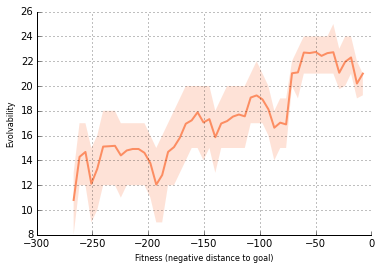

In [115]:
fig=figure()
ax=fig.add_subplot(111)
resx,resy= aggregate1d_prime(-fitness,evo)
mean,median,upper,lower = perc(resy)
    
ax.plot(resx,mean,linewidth=2,color=colors[1])
ax.fill_between(resx,lower,upper,alpha=0.25,linewidth=0, color=colors[1])

ax.set_xlabel("Fitness (negative distance to goal)")
ax.set_ylabel("Evolvability")
ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

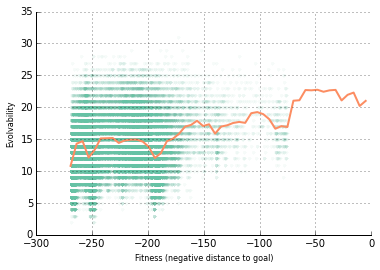

In [90]:
fig=figure()
ax=fig.add_subplot(111)
res= aggregate1d(-fitness,evo)

x,y = sample2d(-fitness,evo,50000)
ax.plot(x,y,".",alpha=0.05,color=colors[0])

ax.plot(res[0],res[1],linewidth=2,color=colors[1])
ax.set_xlabel("Fitness (negative distance to goal)")
ax.set_ylabel("Evolvability")
ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

In [82]:
import scipy.stats
print scipy.stats.pearsonr(-fitness, evo)
print scipy.stats.spearmanr(-fitness,evo)

(0.2593735095002343, 0.0)

## Relationship  between fitness and distance to solution

In [30]:
colors

<function matplotlib.pyplot.colors>

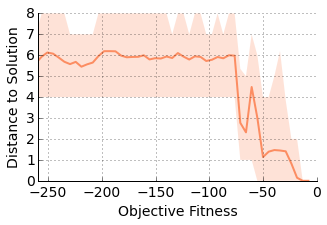

In [50]:
colors = bmap.mpl_colors
params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [5.0, 3.0]
   }
rcParams.update(params)

fig=figure()
ax=fig.add_subplot(111)

resx,resy= aggregate1d_prime(-fitness,domain.distance)
mean,median,upper,lower=perc(resy,5)

x,y = sample2d(-fitness,domain.distance,50000)
ax.set_xlabel("Objective Fitness")
ax.set_ylabel("Distance to Solution")
#ax.plot(x,y,".",alpha=0.05,color=colors[0])
#ax.plot(res[0],res[1],color=colors[1],linewidth=2)
    
ax.plot(resx,mean,linewidth=2,color=colors[1])
ax.fill_between(resx,lower,upper,alpha=0.25,linewidth=0, color=colors[1])

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
if maze=='hard':
 ax.set_xlim(-230,0)
if maze=='medium':
 ax.set_xlim(-260,0)
fig.savefig("fdc_%s.pdf"%maze, bbox_inches='tight')

TypeError: 'function' object has no attribute '__getitem__'

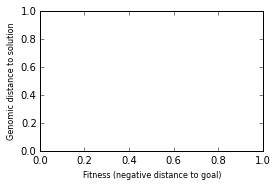

In [23]:
fig=figure()
ax=fig.add_subplot(111)

res= aggregate1d(-fitness,domain.distance)

x,y = sample2d(-fitness,domain.distance,50000)
ax.set_xlabel("Fitness (negative distance to goal)")
ax.set_ylabel("Genomic distance to solution")
ax.plot(x,y,".",alpha=0.05,color=colors[0])
ax.plot(res[0],res[1],color=colors[1],linewidth=2)
ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.savefig("fitness_vs_soldist_%s.pdf"%maze, bbox_inches='tight')

In [53]:
import scipy.stats
print scipy.stats.pearsonr(-fitness, domain.distance)
print scipy.stats.spearmanr(-fitness, domain.distance)

(-0.0010618248432137016, 3.2461242032960069e-12)
(0.0020551291715150293, 1.9503034122863651e-41)


## Relationship between evolvability and distance to solution

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


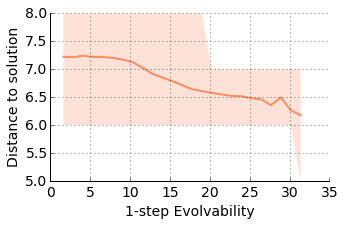

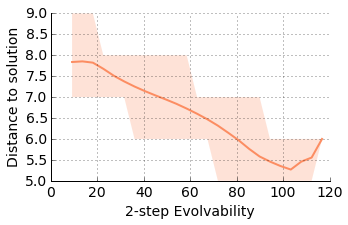

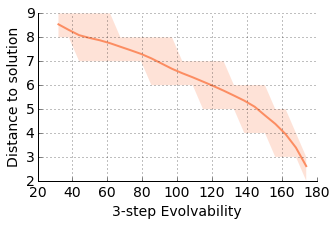

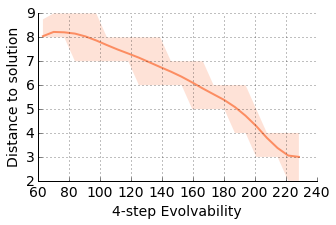

In [9]:
from pylab import *
colors = bmap.mpl_colors
params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [5.0, 3.0]
   }
rcParams.update(params)

for k in range(1,5):
 fig=figure()
 ax=fig.add_subplot(111)

 #title("Evo%d vs Dist to solution"%k)
 resx,resy= aggregate1d_prime(domain.evo[k],domain.distance,gridsize=25)
 mean,median,upper,lower = perc(resy,25)
 #x,y = sample2d(domain.evo[k],domain.distance,50000)


 ax.set_xlabel("%d-step Evolvability" % k)
 ax.set_ylabel("Distance to solution")

 ax.plot(resx,mean,linewidth=2,color=colors[1])
 ax.fill_between(resx,lower,upper,alpha=0.25,linewidth=0, color=colors[1])

 #ax.plot(x,y,".",alpha=0.05,color=colors[0])
 #ax.plot(res[0],res[1],color=colors[1],linewidth=2)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 fig.savefig("evol%d_vs_soldist_%s.pdf"%(k,maze), bbox_inches='tight')



## Everywhere-evolvability vs distance-to-solution

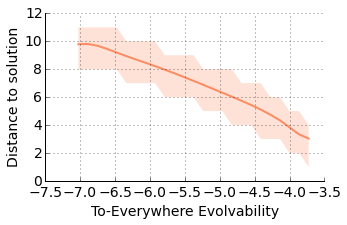

In [10]:
from pylab import *
colors = bmap.mpl_colors
params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [5.0, 3.0]
   }
rcParams.update(params)

if True:
 fig=figure()
 ax=fig.add_subplot(111)

 resx,resy= aggregate1d_prime(-domain.evo_everywhere,domain.distance,gridsize=25)
 mean,median,upper,lower = perc(resy,5)
 #x,y = sample2d(domain.evo_everywhere,domain.distance,50000)

 ax.set_xlabel("To-Everywhere Evolvability")
 ax.set_ylabel("Distance to solution")

 ax.plot(resx,mean,linewidth=2,color=colors[1])
 ax.fill_between(resx,lower,upper,alpha=0.25,linewidth=0, color=colors[1])

 #ax.plot(x,y,".",alpha=0.05,color=colors[0])
 #ax.plot(res[0],res[1],color=colors[1],linewidth=2)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 fig.savefig("evolevo_vs_soldist_%s.pdf"%(maze), bbox_inches='tight')



In [14]:
import scipy.stats
print scipy.stats.pearsonr(-domain.evo_everywhere, domain.distance)
print scipy.stats.spearmanr(domain.evo_everywhere, domain.distance)

(-0.63577299249831298, 0.0)
(0.62119933827215068, 0.0)


In [12]:
for k in range(1,5):
 print k,scipy.stats.pearsonr(domain.evo[k],domain.distance)

1 (-0.15395790216392022, 0.0)
2 (-0.24065120703171022, 0.0)
3 (-0.37355239621291869, 0.0)
4 (-0.4509124079022816, 0.0)


## How well does ideal evolvability measure correlate with 1-step evo?

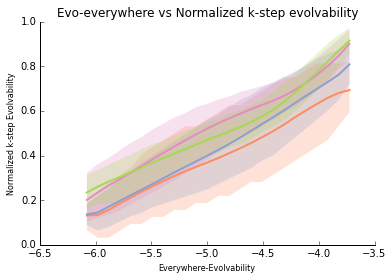

In [142]:
fig=figure()
ax=fig.add_subplot(111)

def normalize(data,_min,_max):
    return (data - _min)/(_max-_min)

for k in range(1,5):

 ax.set_title("Evo-everywhere vs Normalized k-step evolvability")
 
 resx,resy= aggregate1d_prime(-domain.evo_everywhere,domain.evo[k],gridsize=25)
 maxevo = domain.evo[k].max()
 minevo = domain.evo[k].min()
 mean,median,upper,lower = perc(resy,5)
 mean,median,upper,lower = [normalize(z,minevo,maxevo) for z in mean,median,upper,lower] 

 #x,y = sample2d(domain.evo_everywhere,domain.distance,50000)

 ax.set_xlabel("Everywhere-Evolvability" )
 ax.set_ylabel("Normalized k-step Evolvability")

 ax.plot(resx,mean,linewidth=2,color=colors[k])
 ax.fill_between(resx,lower,upper,alpha=0.25,linewidth=0, color=colors[k])

 #ax.plot(x,y,".",alpha=0.05,color=colors[0])
 #ax.plot(res[0],res[1],color=colors[1],linewidth=2)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 fig.savefig("evolevo_vs_soldist_%s.pdf"%(maze), bbox_inches='tight')

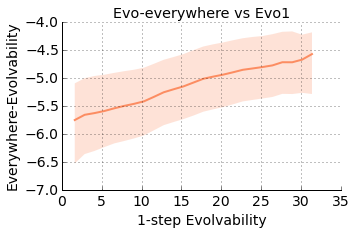

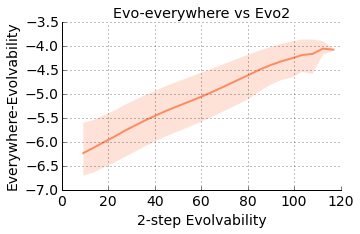

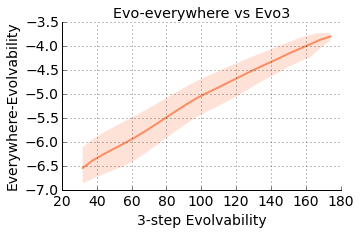

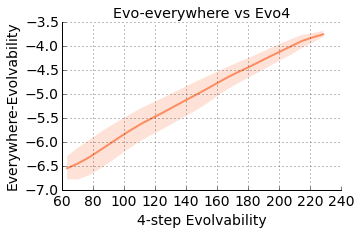

In [13]:
for k in range(1,5):

    
 fig=figure()
 ax=fig.add_subplot(111)
 ax.set_title("Evo-everywhere vs Evo%d" % k)
 
 resx,resy= aggregate1d_prime(domain.evo[k],-domain.evo_everywhere,gridsize=25)
 mean,median,upper,lower = perc(resy,5)
 #x,y = sample2d(domain.evo_everywhere,domain.distance,50000)

 ax.set_ylabel("Everywhere-Evolvability" )
 ax.set_xlabel("%d-step Evolvability" %k)

 ax.plot(resx,mean,linewidth=2,color=colors[1])
 ax.fill_between(resx,lower,upper,alpha=0.25,linewidth=0, color=colors[1])

 #ax.plot(x,y,".",alpha=0.05,color=colors[0])
 #ax.plot(res[0],res[1],color=colors[1],linewidth=2)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 fig.savefig("evolevo_vs_soldist_%s.pdf"%(maze), bbox_inches='tight')

In [126]:
for k in range(1,5):
 print k,scipy.stats.pearsonr(-domain.evo_everywhere, domain.evo[k])

1 (0.48918503336905783, 0.0)
2 (0.64502559185390851, 0.0)
3 (0.68592072902234147, 0.0)
4 (0.79720674935465152, 0.0)


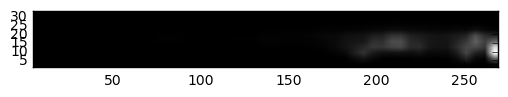

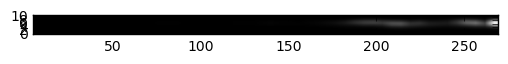

In [148]:
title("Fitness vs Evolvability")
heatmap(fitness,evo,gridsize=[50,10])
figure()
title("Fitness vs True Distance to Goal")
heatmap(fitness,domain.distance,gridsize=[50,10])

# Behavior distribution

In [150]:
def construct_behavior_grid(xdata,ydata,default_val=None,quantity=None,grid_sz=30):
    cnt = np.zeros((grid_sz,grid_sz))
    #evo_dist = np.zeros((grid_sz,grid_sz))-1
    
    xmax = xdata.max()+0.00001
    ymax = ydata.max()+0.00001

    xcoord = (beh[0]/xmax)*(grid_sz)
    ycoord = (beh[1]/ymax)*(grid_sz)

    xcoord = xcoord.astype(int)
    ycoord = ycoord.astype(int)
    
    print "adding..."
    np.add.at(cnt,(xcoord,ycoord),1)
    cnt/=xcoord.shape[0]
    
    if quantity!=None:
     total = np.zeros((grid_sz,grid_sz))
     np.add.at(total,(xcoord,ycoord),quantity)
     mean = total/cnt
     return mean

    if default_val != None:
        print "not none..."
        cnt[cnt==0] = default_val
        cnt[cnt!=0] = np.log(cnt[cnt!=0])
     
    return cnt


## Behavior Density

adding...
not none...


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in log


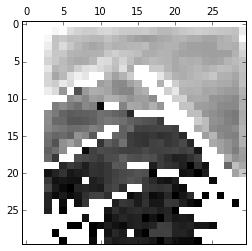

In [151]:
gray()
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],default_val=-0.05))


## Fitness Distribution

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


adding...


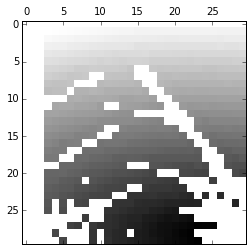

In [152]:
gray()
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=fitness))

## Evolvability Distribution

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


adding...


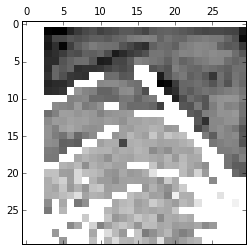

In [153]:
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=evo))

## Distance to solution distribution

adding...


/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


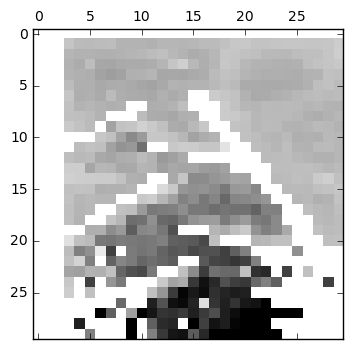

In [147]:
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=domain.distance))

In [14]:
xmax = domain.data["x"].max()+0.00001
ymax = domain.data["y"].max()+0.00001
xcoord = (beh[0]/xmax)*(grid_sz)
ycoord = (beh[1]/ymax)*(grid_sz)
xcoord = xcoord.astype(int)
ycoord = ycoord.astype(int)

print "adding..."
np.add.at(evo_cnt,(xcoord,ycoord),1)
np.add.at(evo_dist,(xcoord,ycoord),fitness)


adding...


In [15]:
np.unravel_index(np.argmax(evo_cnt),evo_cnt.shape)

evo_mean = evo_dist/evo_cnt

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


28884187039.0


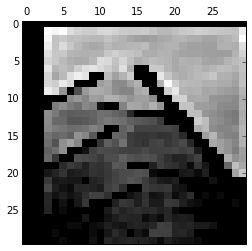

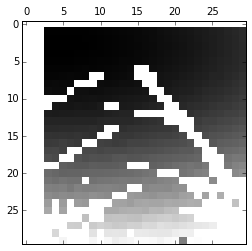

In [16]:
from pylab import *
gray()
matshow(np.log(evo_cnt+1))
figure()
matshow(evo_mean)
print evo_dist.max()

In [17]:
(domain.distance==0).sum()

43046401

# Behavior distribution

## Validation barchart

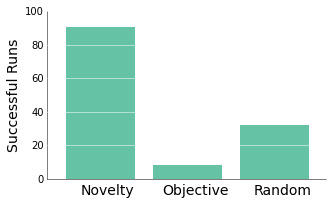

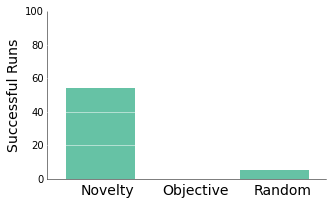

In [28]:
from pylab import *

params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.0, 3.0]
   }
rcParams.update(params)

import prettyplotlib as ppl
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

np.random.seed(14)

x=["Novelty","Objective","Random"]
y=[91,9,33]

# 'y' for make a grid based on where the major ticks are on the y-axis
ppl.bar(ax, [0,1,2], y, grid='y')
ax.set_xticks(arange(3)+0.5)
ax.set_xticklabels(x)
ax.set_ylabel("Successful Runs")
fig.savefig('validation_medium.pdf')

figure()

fig, ax = plt.subplots(1)

np.random.seed(14)

x=["Novelty","Objective","Random"]
y=[55,0,6]

# 'y' for make a grid based on where the major ticks are on the y-axis
ppl.bar(ax, [0,1,2], y, grid='y')
ax.set_xticks(arange(3)+0.5)
ax.set_xticklabels(x)
ax.set_ylim(0,100)
ax.set_ylabel("Successful Runs")
fig.savefig('validation_hard.pdf')

## Exotic search barplot

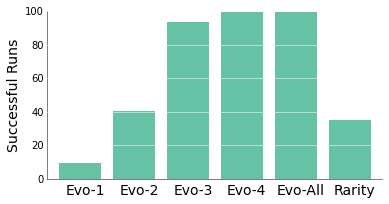

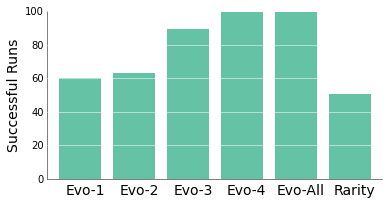

In [29]:
from pylab import *

params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [6.0, 3.0]
   }
rcParams.update(params)

import prettyplotlib as ppl
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

np.random.seed(14)

x=["Evo-1","Evo-2","Evo-3","Evo-4","Evo-All","Rarity"]
y=[10,41,94,100,100,36]

# 'y' for make a grid based on where the major ticks are on the y-axis
ppl.bar(ax, [0,1,2,3,4,5], y, grid='y')
ax.set_xticks(arange(6)+0.5)
ax.set_xticklabels(x)
ax.set_ylabel("Successful Runs")
fig.savefig('driving_medium.pdf')

figure()

fig, ax = plt.subplots(1)

np.random.seed(14)

x=["Evo-1","Evo-2","Evo-3","Evo-4","Evo-All","Rarity"]
y=[61,64,90,100,100,51]

# 'y' for make a grid based on where the major ticks are on the y-axis
ppl.bar(ax, [0,1,2,3,4,5], y, grid='y')
ax.set_xticks(arange(6)+0.5)
ax.set_xticklabels(x)
ax.set_ylim(0,100)
ax.set_ylabel("Successful Runs")
fig.savefig('driving_hard.pdf')

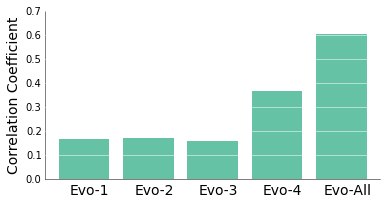

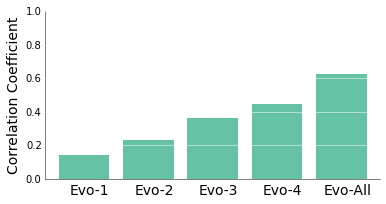

In [26]:
from pylab import *

params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [6.0, 3.0]
   }
rcParams.update(params)

import prettyplotlib as ppl
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

np.random.seed(14)

x=["Evo-1","Evo-2","Evo-3","Evo-4","Evo-All"]
y=[0.17,0.175,0.163,0.37,0.61]

# 'y' for make a grid based on where the major ticks are on the y-axis
ppl.bar(ax, [0,1,2,3,4], y, grid='y')
ax.set_xticks(arange(5)+0.5)
ax.set_xticklabels(x)
ax.set_ylabel("Correlation Coefficient")
fig.savefig('corr_medium.pdf')

figure()

fig, ax = plt.subplots(1)

np.random.seed(14)

x=["Evo-1","Evo-2","Evo-3","Evo-4","Evo-All"]
y=[0.15,0.24,0.37,0.45,0.63]

# 'y' for make a grid based on where the major ticks are on the y-axis
ppl.bar(ax, [0,1,2,3,4], y, grid='y')
ax.set_xticks(arange(5)+0.5)
ax.set_xticklabels(x)
ax.set_ylim(0,1)
ax.set_ylabel("Correlation Coefficient")
fig.savefig('corr_hard.pdf')